In [1]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import numpy as np


In [4]:
batch_size = 32
learning_rate = 0.001
num_epochs = 50
# using 50 epochs to find optimal number of epochs ~ 20-30
data_dir = '/home/tzj7qc/pet_images'


In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Split the training dataset into training and validation sets
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_subset, val_subset = random_split(full_dataset, [train_size, val_size])

# Data loaders for training and validation subsets
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)


In [6]:
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # Adjust the output layer to match the number of classes
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')


/home/tzj7qc/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tzj7qc/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [8]:
for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    
    # Training phase
    for images, labels in train_loader:
        images, labels = images.to('cuda'), labels.to('cuda')

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
    
    # Calculate training loss
    train_loss = running_train_loss / len(train_loader)
    
    # Validation phase
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to('cuda'), labels.to('cuda')

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()

    # Calculate validation loss
    val_loss = running_val_loss / len(val_loader)

    # Print training and validation losses
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


Epoch [1/50], Train Loss: 2.2272, Validation Loss: 2.9228
Epoch [2/50], Train Loss: 1.3739, Validation Loss: 2.4322
Epoch [3/50], Train Loss: 0.9865, Validation Loss: 1.3241
Epoch [4/50], Train Loss: 0.7428, Validation Loss: 1.5726
Epoch [5/50], Train Loss: 0.6075, Validation Loss: 1.6154
Epoch [6/50], Train Loss: 0.5366, Validation Loss: 1.4214
Epoch [7/50], Train Loss: 0.4073, Validation Loss: 1.2762
Epoch [8/50], Train Loss: 0.3120, Validation Loss: 1.4503
Epoch [9/50], Train Loss: 0.3383, Validation Loss: 1.8252
Epoch [10/50], Train Loss: 0.3138, Validation Loss: 1.5628
Epoch [11/50], Train Loss: 0.2451, Validation Loss: 1.2534
Epoch [12/50], Train Loss: 0.1605, Validation Loss: 1.4837
Epoch [13/50], Train Loss: 0.2140, Validation Loss: 2.3277
Epoch [14/50], Train Loss: 0.2616, Validation Loss: 2.0585
Epoch [15/50], Train Loss: 0.1555, Validation Loss: 1.0667
Epoch [16/50], Train Loss: 0.1337, Validation Loss: 1.2333
Epoch [17/50], Train Loss: 0.1443, Validation Loss: 1.3401
Epoch 

Overall Test Accuracy: 72.33%

Per-Class Accuracy:
Abyssinian: 70.73%
Bengal: 85.37%
Birman: 76.74%
Bombay: 100.00%
British_Shorthair: 78.26%
Egyptian_Mau: 79.55%
Maine_Coon: 83.78%
Persian: 81.82%
Ragdoll: 41.46%
Russian_Blue: 71.79%
Siamese: 79.49%
Sphynx: 76.32%
american_bulldog: 57.45%
american_pit_bull_terrier: 70.59%
basset_hound: 76.32%
beagle: 25.64%
boxer: 77.78%
chihuahua: 31.58%
english_cocker_spaniel: 70.00%
english_setter: 51.72%
german_shorthaired: 61.90%
great_pyrenees: 70.59%
havanese: 81.82%
japanese_chin: 90.48%
keeshond: 76.19%
leonberger: 86.11%
miniature_pinscher: 67.65%
newfoundland: 77.78%
pomeranian: 72.73%
pug: 88.24%
saint_bernard: 58.70%
samoyed: 90.00%
scottish_terrier: 85.29%
shiba_inu: 76.19%
staffordshire_bull_terrier: 56.41%
wheaten_terrier: 73.81%
yorkshire_terrier: 78.57%

Classification Report:
                            precision    recall  f1-score   support

                Abyssinian       0.71      0.71      0.71        41
                    Be

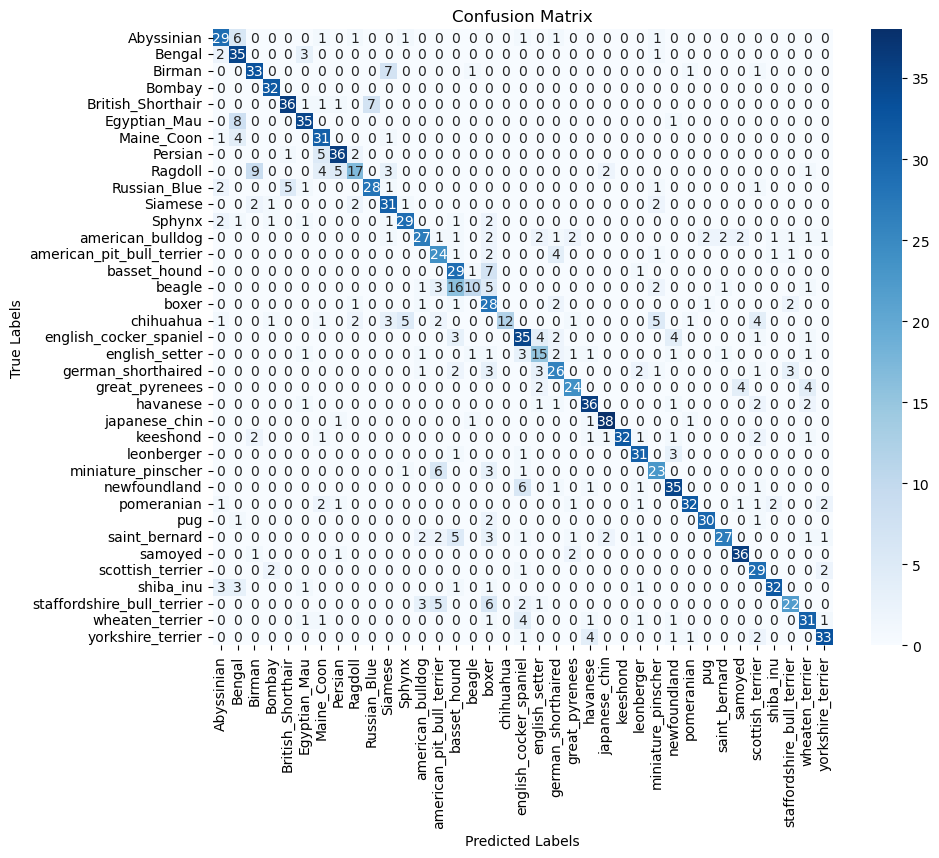

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize variables for tracking predictions
all_preds = []
all_labels = []

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Accumulate predictions and labels for metrics
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Overall accuracy
accuracy = 100 * correct / total
print(f"Overall Test Accuracy: {accuracy:.2f}%")

# Per-class accuracy
classes = val_loader.dataset.dataset.classes  # Assumes ImageFolder structure
conf_matrix = confusion_matrix(all_labels, all_preds)
print("\nPer-Class Accuracy:")
for idx, class_name in enumerate(classes):
    class_accuracy = 100 * conf_matrix[idx, idx] / conf_matrix[idx].sum()
    print(f"{class_name}: {class_accuracy:.2f}%")

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()